# Zadanie na 3

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Wczytywanie danych

In [26]:
headings = ['season',
            'age',
            'diseases',
            'accident',
            'surgery',
            'fever',
            'alcohol',
            'smoking',
            'sittingHours',
            'diagnosis']

data = pd.read_csv('../dane/fertility_Diagnosis.data', names=headings)
data

season   age  diseases  accident  surgery  fever  alcohol  smoking  \
0    -0.33  0.69         0         1        1      0      0.8        0   
1    -0.33  0.94         1         0        1      0      0.8        1   
2    -0.33  0.50         1         0        0      0      1.0       -1   
3    -0.33  0.75         0         1        1      0      1.0       -1   
4    -0.33  0.67         1         1        0      0      0.8       -1   
..     ...   ...       ...       ...      ...    ...      ...      ...   
95   -1.00  0.67         1         0        0      0      1.0       -1   
96   -1.00  0.61         1         0        0      0      0.8        0   
97   -1.00  0.67         1         1        1      0      1.0       -1   
98   -1.00  0.64         1         0        1      0      1.0        0   
99   -1.00  0.69         0         1        1      0      0.6       -1   

    sittingHours diagnosis  
0           0.88         N  
1           0.31         O  
2           0.50         N  
3           0.38         N  
4           0.50         O  
..           ...       ...  
95          0.50         N  
96          0.50         N  
97          0.31         N  
98          0.19         N  
99          0.19         N  

[100 rows x 10 columns]

#### Wyznaczanie dominanty dla cech jakościowych

In [27]:
qualityData = data[['season', 'diseases', 'accident', 'surgery', 'fever', 'alcohol', 'smoking', 'diagnosis']]
mode = qualityData.mode()
print("Dominanta cech jakościowych:")
mode

Dominanta cech jakościowych:


season  diseases  accident  surgery  fever  alcohol  smoking diagnosis
0   -0.33         1         0        1      0      1.0       -1         N

#### Wyznaczanie mediany, minimum i maksimum dla cech ilościowych

In [28]:
quantityData = data[['age', 'sittingHours']]
quantityData

age  sittingHours
0   0.69          0.88
1   0.94          0.31
2   0.50          0.50
3   0.75          0.38
4   0.67          0.50
..   ...           ...
95  0.67          0.50
96  0.61          0.50
97  0.67          0.31
98  0.64          0.19
99  0.69          0.19

[100 rows x 2 columns]

In [29]:
median = quantityData.median()
print("Mediana cech ilościowych:")
median

Mediana cech ilościowych:


age             0.67
sittingHours    0.38
dtype: float64

In [30]:
minimum = quantityData.min()
print("Minimum cech ilościowych:")
minimum

Minimum cech ilościowych:


age             0.50
sittingHours    0.06
dtype: float64

In [31]:
maximum = quantityData.max()
print("Maximum cech ilościowych:")
maximum

Maximum cech ilościowych:


age             1.0
sittingHours    1.0
dtype: float64

#### Wyznaczanie współczynnika korelacji Pearsona

In [32]:
correlation = quantityData["age"].corr(quantityData["sittingHours"])
print("Współczynnik korelacji Pearsona:")
correlation

Współczynnik korelacji Pearsona:


-0.4424519514466223

#### Tworzenie histogramów

##### Zaokrąglanie wieku do pełnych lat

In [33]:
age = (quantityData.loc[:, 'age'] + 1) * 18
age = age.round()

##### Obliczanie częstotliwości wystąpień każdego wieku

In [34]:
bins = age.value_counts()

###### Rysowanie histogramu wieku

In [35]:
plt.figure(figsize=(10,7))
plt.bar(bins.index, bins.values, alpha=0.8, color="m", edgecolor="k")
plt.xticks(bins.index) 
plt.grid(axis='y', alpha=0.75)
plt.xlabel("wiek [lata]", FontSize='16')
plt.ylabel("częstotliwość wystąpień", FontSize='16')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Histogram wieku osób poddanych badaniu", FontSize='16')
plt.show()

##### Zaokrąglanie czasu spędzanego przed komputerem do pełnych godzin

In [36]:
hours = quantityData.loc[:, 'sittingHours'] * 16
hours = np.round(hours)

##### Obliczanie częstotliwości wystąpień każdego czasu zaokrąglona w dół

In [37]:
bins = hours.value_counts()

##### Rysowanie histogramu wieku

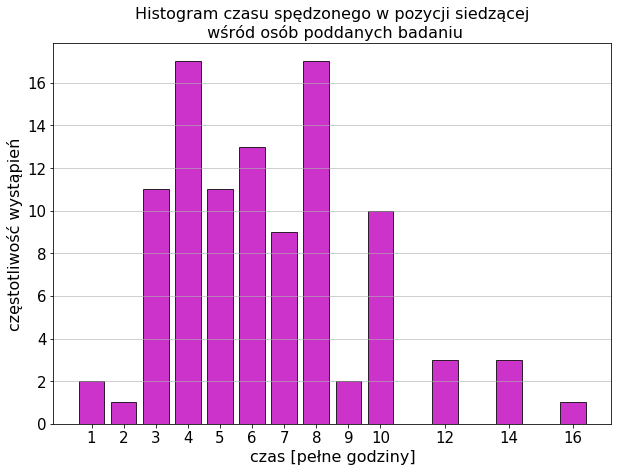

In [38]:
plt.figure(figsize=(10,7))
plt.bar(bins.index, bins.values, alpha=0.8, color="m", edgecolor="k")
plt.xticks(bins.index) 
plt.grid(axis='y', alpha=0.75)
plt.xlabel("czas [pełne godziny]", FontSize='16')
plt.ylabel("częstotliwość wystąpień", FontSize='16')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Histogram czasu spędzonego w pozycji siedzącej\n wśród osób poddanych badaniu", FontSize='16')
plt.show()